<a href="https://colab.research.google.com/github/Yoanvari/PCVK2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 10: Thresholding

Nama  : Muhammad Yoanvari Al Farizi

NIM   : 2241720096

Kelas : TI-3D

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

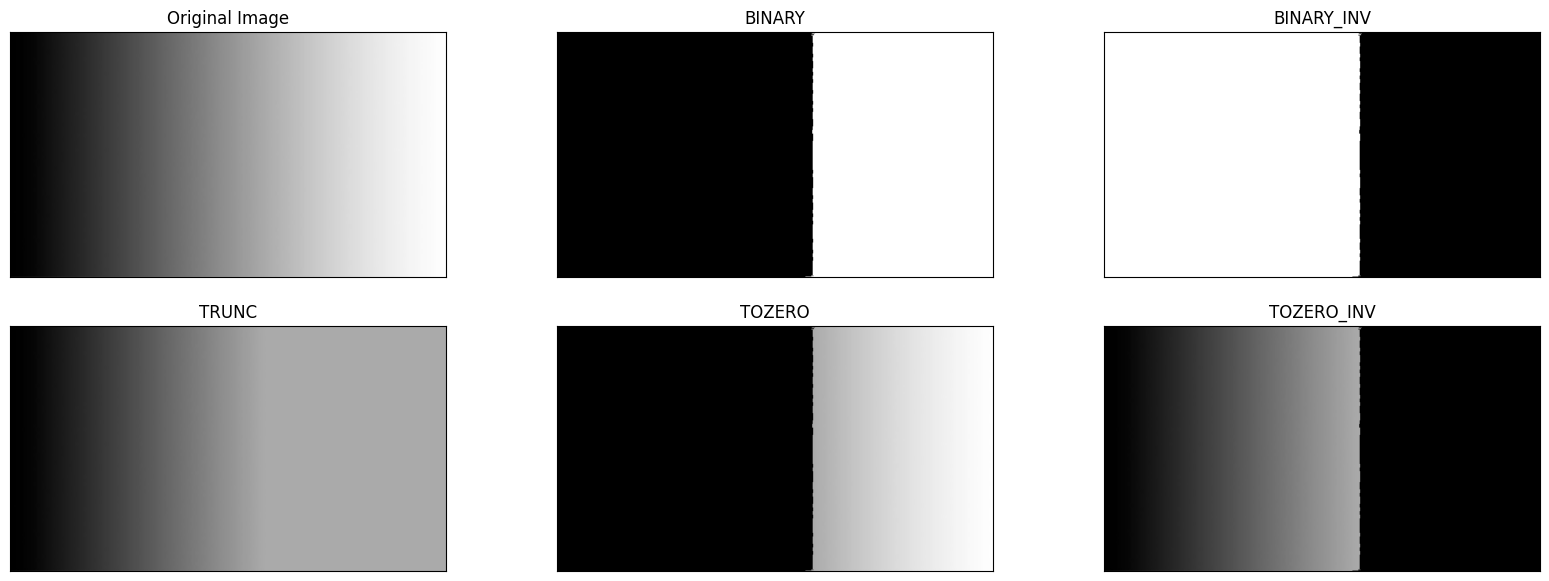

In [2]:
img = cv2.imread('/content/drive/MyDrive/PCVK/image/gradient.jpg')
treshold_value = 170

ret, thresh1 = cv2.threshold(img, treshold_value, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, treshold_value, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, treshold_value, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, treshold_value, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, treshold_value, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(20,7))
for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

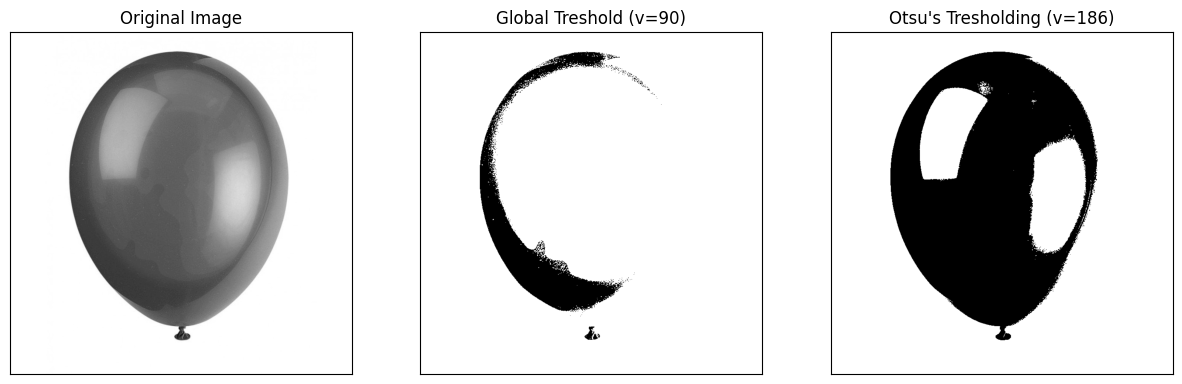

In [6]:
balon = cv2.imread('/content/drive/MyDrive/PCVK/image/balloon.jpg', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([balon], [0], None, [256], [0, 256])

p = hist / np.sum(hist)
weighted_sum = np.arange(256) * p

variance = np.zeros(256)
for i in range(256):
  w0 = np.sum(p[:i])
  w1 = np.sum(p[i:])
  if w0 == 0 or w1 == 0:
    continue
  m0 = np.sum(weighted_sum[:i]) / w0
  m1 = np.sum(weighted_sum[i:]) / w1
  variance[i] = w0 * w1 * (m0 - m1) ** 2

threshold_otsu = np.argmax(variance)

ret, thresh_otsu = cv2.threshold(balon, threshold_otsu, 255, cv2.THRESH_BINARY)

threshold_global = 90
ret, thresh_global = cv2.threshold(balon, threshold_global, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(balon, 'gray'), plt.title('Original Image'),plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2), plt.imshow(thresh_global, 'gray'), plt.title('Global Treshold (v=90)'),plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3), plt.imshow(thresh_otsu, 'gray'), plt.title('Otsu\'s Tresholding (v=186)'),plt.xticks([]),plt.yticks([])
plt.show()

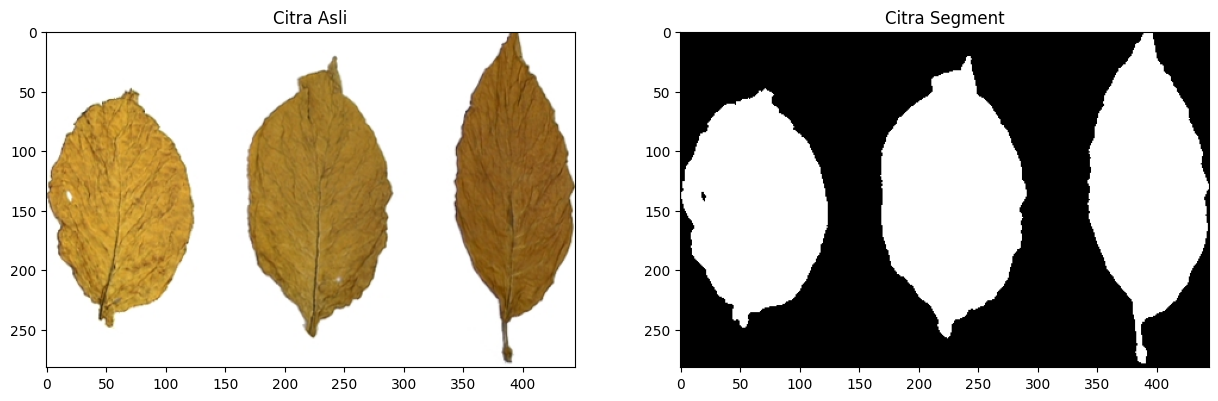

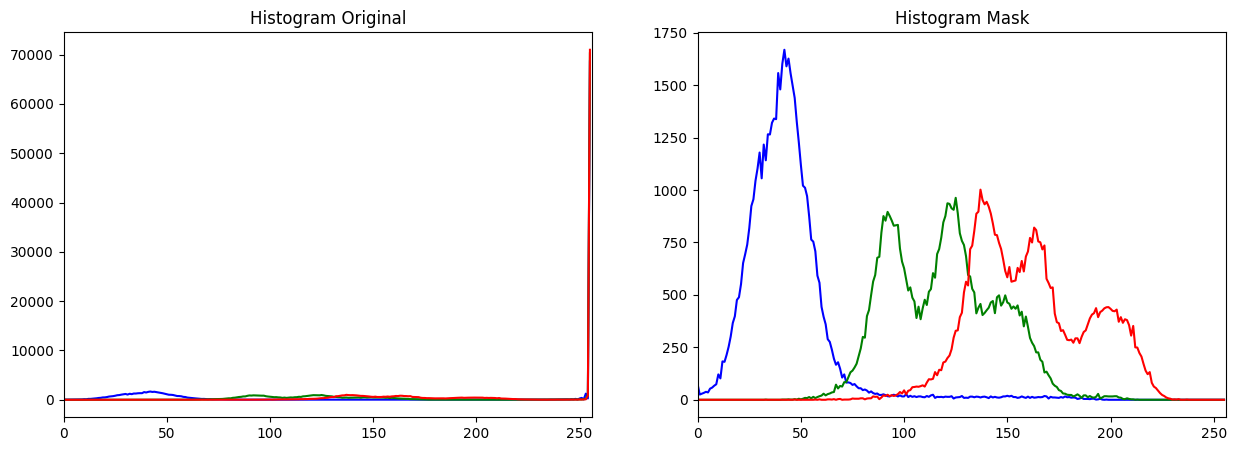

In [11]:
tobbaco = cv2.imread('/content/drive/MyDrive/PCVK/image/tobacco.jpg', 1)
tobbaco_rgb = cv2.cvtColor(tobbaco, cv2.COLOR_BGR2RGB)

tobbaco_gray = cv2.cvtColor(tobbaco_rgb, cv2.COLOR_BGR2GRAY)

_, tobbaco_mask = cv2.threshold(tobbaco_gray, 200, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1), plt.imshow(tobbaco_rgb, 'gray'), plt.title('Citra Asli')
plt.subplot(1,2,2), plt.imshow(tobbaco_mask, 'gray'), plt.title('Citra Segment')
plt.show()

hist1_red = cv2.calcHist([tobbaco_rgb], [0], None, [256], [0, 256])
hist1_green = cv2.calcHist([tobbaco_rgb], [1], None, [256], [0, 256])
hist1_blue = cv2.calcHist([tobbaco_rgb], [2], None, [256], [0, 256])
hist2_blue = cv2.calcHist([tobbaco], [0], tobbaco_mask, [256], [0, 256])
hist2_green = cv2.calcHist([tobbaco], [1], tobbaco_mask, [256], [0, 256])
hist2_red = cv2.calcHist([tobbaco], [2], tobbaco_mask, [256], [0, 256])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Histogram Original')
plt.plot(hist1_blue, color='blue')
plt.plot(hist1_green, color='green')
plt.plot(hist1_red, color='red')
plt.xlim([0, 256])

plt.subplot(1,2,2)
plt.title('Histogram Mask')
plt.plot(hist2_blue, color='blue')
plt.plot(hist2_green, color='green')
plt.plot(hist2_red, color='red')
plt.xlim([0, 256])
plt.show()

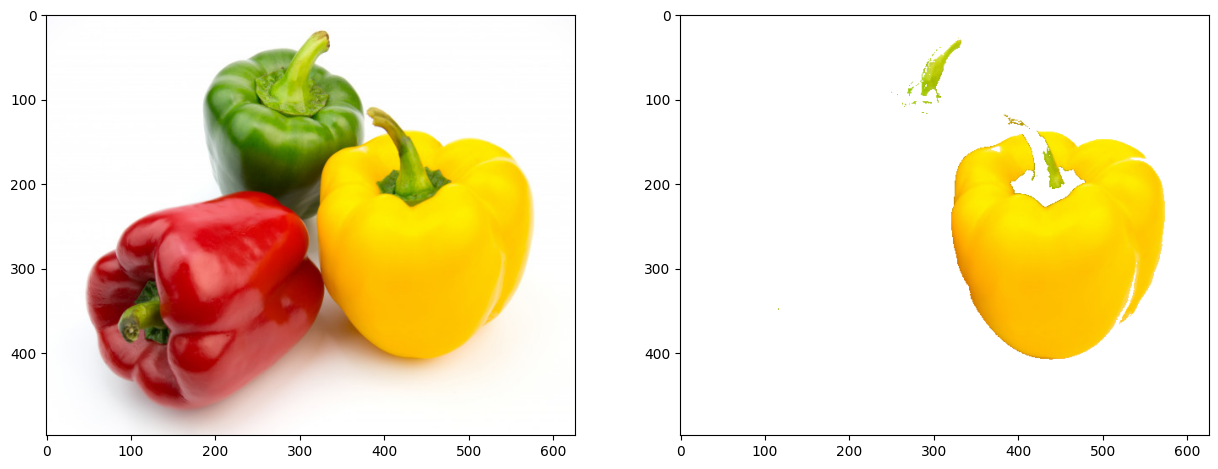

In [19]:
pepper = cv2.imread('/content/drive/MyDrive/PCVK/image/peppers.jpg')
pepper_rgb = cv2.cvtColor(pepper, cv2.COLOR_BGR2RGB)

from sklearn.cluster import KMeans

pixel_values = pepper_rgb.reshape((-1, 3))

pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

labels = labels.flatten()

segmented_image = centers[labels.flatten()]

segmented_image = segmented_image.reshape(pepper_rgb.shape)

pepper_mask = np.copy(pepper_rgb)

pepper_mask = pepper_mask.reshape((-1, 3))

pepper_mask[labels == 4] = [255,255,255]
pepper_mask[labels == 2] = [255,255,255]
pepper_mask[labels == 3] = [255,255,255]
pepper_mask[labels == 1] = [255,255,255]

pepper_mask = pepper_mask.reshape(pepper_rgb.shape)
plt.figure(figsize = (15,10))
plt.subplot(1,2,1),plt.imshow(pepper_rgb)
plt.subplot(1,2,2),plt.imshow(pepper_mask)
plt.show()

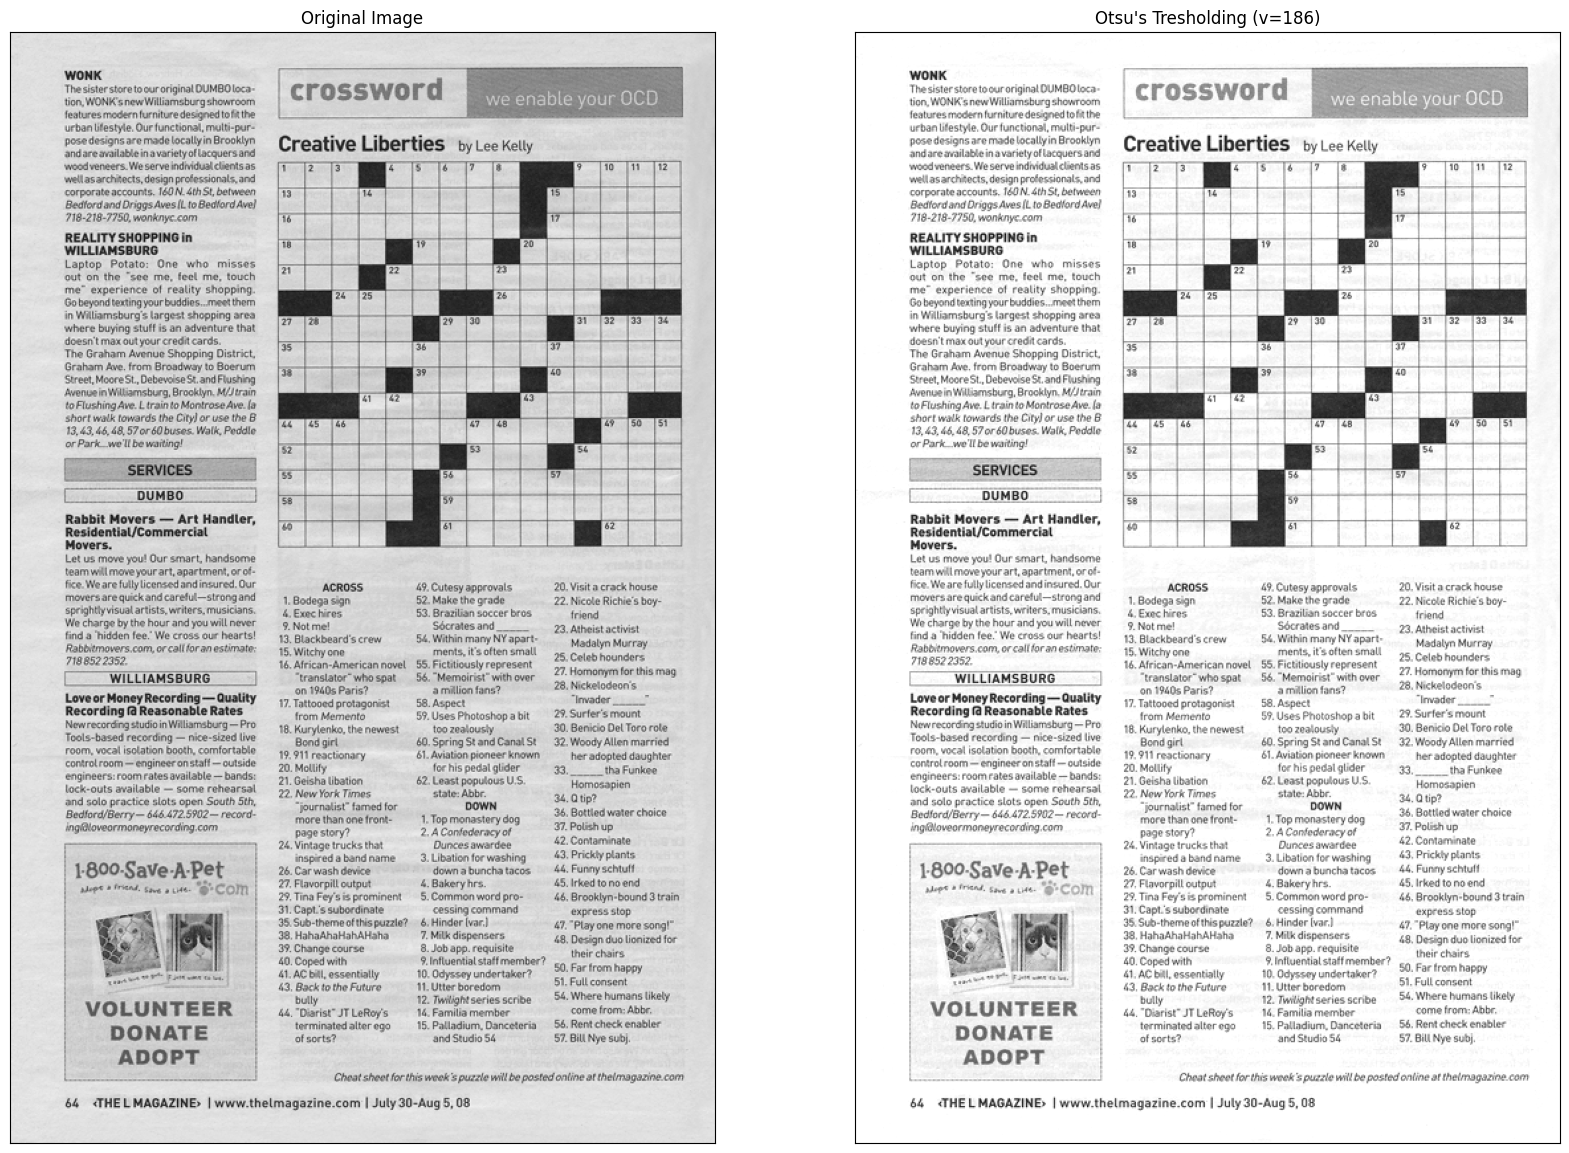

In [40]:
from google.colab.patches import cv2_imshow
crossword = cv2.imread('/content/drive/MyDrive/PCVK/image/crossword.jpg', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([crossword], [0], None, [256], [0, 256])

p = hist / np.sum(hist)
weighted_sum = np.arange(256) * p

variance = np.zeros(256)
for i in range(256):
  w0 = np.sum(p[:i])
  w1 = np.sum(p[i:])
  if w0 == 0 or w1 == 0:
    continue
  m0 = np.sum(weighted_sum[:i]) / w0
  m1 = np.sum(weighted_sum[i:]) / w1
  variance[i] = w0 * w1 * (m0 - m1) ** 2

threshold_otsu = np.argmax(variance)

ret, thresh_otsu = cv2.threshold(crossword, threshold_otsu, 255, cv2.THRESH_BINARY+cv2.THRESH_TRUNC)

plt.figure(figsize=(20,15))
plt.subplot(1,2,1), plt.imshow(crossword, 'gray'), plt.title('Original Image'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2), plt.imshow(thresh_otsu, 'gray'), plt.title('Otsu\'s Tresholding (v=186)'),plt.xticks([]),plt.yticks([])
plt.show()